# Esteganografía

Este proyecto consiste en esconder texto dentro de una imagen de tal forma que tanto el texto como la imagen no se vean (afectada en el caso de la imagen) a simple vista. Dicha técnica se conoce como Esteganografía.

Se trabajará con Python para generar un mensaje codificado, de tal forma que contenta el número de bits significativos de la imagen sobre los que se esconde el texto, el texto como tal y un mensaje de fin. Dicho mensaje de término se agregó para indicarle al código que la lectura debería llegar hasta dicho punto.

# Introducción

La Esteganografía existe desde hace siglos. Según Wikipedia se aplicó en las primeras veces por Heródoto en el libro de las Historias:

_"En este libro describe cómo un personaje tomó un cuadernillo de dos hojas o tablillas; rayó bien la cera que las cubría y en la madera misma grabó el mensaje y lo volvió a cubrir con cera regular._

_Otra historia, en el mismo libro, relata cómo otro personaje había rasurado a navaja la cabeza de su esclavo de mayor confianza, le tatuó el mensaje en el cuero cabelludo, esperó después a que le volviera a crecer el cabello y lo mandó al receptor del mensaje, con instrucciones de que le rasuraran la cabeza."_



# Imports

In [1]:
from skimage import io

# Imagen original

Para abrir la imagen y mostrarla, ocuparemos `scikit-image.io.imread()` 

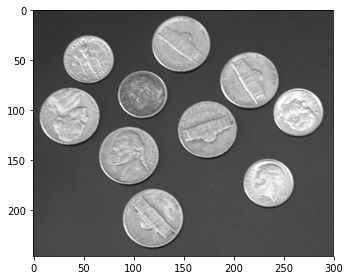

In [2]:
imageFilename = r"imagen.png"
image = io.imread(imageFilename)
io.imshow(image)
io.show()

# Texto original

El texto se carga por `open`, con permisos unicamente de lectura.

In [3]:
textFilename = r"texto.txt"
text = open(textFilename,'r').read()
print(text)

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Vivamus auctor maximus dignissim. Etiam luctus elit nec risus varius volutpat. Vivamus arcu ante, tempus nec luctus commodo, blandit vel neque. Pellentesque semper posuere purus, et finibus leo accumsan non. Sed sed felis vel erat pretium molestie. Nulla facilisi. Proin vel lacus et leo tristique luctus eu nec nulla. Nullam finibus lobortis porta. Vestibulum sit amet lacus eros. Aliquam tempus augue quis lacus gravida aliquet.

Maecenas eget purus est. Etiam ac lectus ac magna commodo molestie in eget ante. Vestibulum porta mauris nec risus finibus, nec elementum purus vulputate. Nunc non eros lobortis, vestibulum nibh eget, sagittis justo. Suspendisse eget tellus vitae dolor fermentum elementum. Nulla luctus nulla vel volutpat dictum. Morbi ac nulla interdum, semper lacus quis, eleifend eros.

Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Vestibulum ante ipsum primis in faucibus or

# Codificación

El proceso de codificación y decodificación se realizarán por medio de operaciones a nivel de bits. El procedimiento se podría resumir de la siguiente manera:

    - Calcular la máscara
    - Generar una lista de bits que contienen el texto codificado
    - Aplicar la codificacion a la imagen

## Calculo de la máscara
Para calculár la máscara, se definirá una variable que indica el número de bits (`nbit`) a usar. Para el valor de la máscara, se calcula el valor máximo para un byte/pixel (0-255) y se le resta el $2^nbits$. De esta forma, por ejemplo, para un `nbit` de 3 se tiene una máscara de 0b 1111 1011.

In [4]:
def getMask(nbits):
    return 255-(2**(int(nbits)-1))

Así, las máscaras que ocuparemos para los distintos bytes serán:

In [5]:
for i in range(1,9):
    print(bin(getMask(i)))

0b11111110
0b11111101
0b11111011
0b11110111
0b11101111
0b11011111
0b10111111
0b1111111


## Codificación del texto a bits

La generación de una lista con el texto codificado está compuesta de 3 partes: 
- Agregar 4 bits que indican la cantidad de bits significativos con los que se encriptó la imagen.
- Convertir los caracteres (bytes) a bits.
- Agregar una marca para indicar el final del archivo.

Para agregar el número de bits significativos con los que se encriptó la imagen se desplaza hacia la derecha 1 uno la cantidad de veces que se especifica con nBits. El proceso se realiza con los operadores ">>" y $"\&"$. El código se aprecia a continuación:

### Conversión a bits

In [6]:
def getEncodedNbits(nbits):
    encodedNbits = []
    
    tmp = int(nbits)
    for i in range(0,4):
        encodedNbits.append(tmp & 1)
        tmp = tmp >> 1

    return encodedNbits

In [7]:
for i in range(0,32):
    print(i,"\t", getEncodedNbits(i))

0 	 [0, 0, 0, 0]
1 	 [1, 0, 0, 0]
2 	 [0, 1, 0, 0]
3 	 [1, 1, 0, 0]
4 	 [0, 0, 1, 0]
5 	 [1, 0, 1, 0]
6 	 [0, 1, 1, 0]
7 	 [1, 1, 1, 0]
8 	 [0, 0, 0, 1]
9 	 [1, 0, 0, 1]
10 	 [0, 1, 0, 1]
11 	 [1, 1, 0, 1]
12 	 [0, 0, 1, 1]
13 	 [1, 0, 1, 1]
14 	 [0, 1, 1, 1]
15 	 [1, 1, 1, 1]
16 	 [0, 0, 0, 0]
17 	 [1, 0, 0, 0]
18 	 [0, 1, 0, 0]
19 	 [1, 1, 0, 0]
20 	 [0, 0, 1, 0]
21 	 [1, 0, 1, 0]
22 	 [0, 1, 1, 0]
23 	 [1, 1, 1, 0]
24 	 [0, 0, 0, 1]
25 	 [1, 0, 0, 1]
26 	 [0, 1, 0, 1]
27 	 [1, 1, 0, 1]
28 	 [0, 0, 1, 1]
29 	 [1, 0, 1, 1]
30 	 [0, 1, 1, 1]
31 	 [1, 1, 1, 1]


### Letras a bits
Convertir los caracteres a bits se logra de la misma manera. En la medida que se desplazan ($>>$) y se aislan ($\& 1$) se van agregando a la lista. 

El mismo proceso se ocupara para la marca del EOF. En ese caso se ocupó la siguiente variable.

In [8]:
END_OF_FILE = "$EOF"

El código se puede apreciar a continuación.

In [9]:
def getEncodedText(nbits, text):
    encodedText = []

    #Convertir cada caracter a bits y agregarlos a una lista:
    for char in text:
        byte = []
        tmp = ord(char)
        for i in range(0,8):
            byte.append(tmp & 1)
            tmp = tmp >> 1
        # Agregar bytes a la lista:
        [encodedText.append(i) for i in byte[::-1]]

    return encodedText

In [10]:
def testEncoding(letter):
    print("letter\t", letter)
    print("Ordinal\t", ord(letter))
    print("Binary\t", bin(ord(letter)))
    print("Encode\t", getEncodedText(0, letter))

In [11]:
testEncoding("h")

letter	 h
Ordinal	 104
Binary	 0b1101000
Encode	 [0, 1, 1, 0, 1, 0, 0, 0]


### Texto a bits
Agregando el EOF

In [12]:
def getEncodedText(nbits, text):
    encodedText = []

    #Convertir cada caracter a bits y agregarlos a una lista:
    for char in text:
        byte = []
        tmp = ord(char)
        for i in range(0,8):
            byte.append(tmp & 1)
            tmp = tmp >> 1
        # Agregar byts a la lista:
        [encodedText.append(i) for i in byte[::-1]]

    # Convertir cada caracter a bits y agregarlos a una lista:
    for char in END_OF_FILE:
        byte = []
        tmp = ord(char)
        for i in range(0, 8):
            byte.append(tmp & 1)
            tmp = tmp >> 1
        # Agregar byts a la lista:
        [encodedText.append(i) for i in byte[::-1]]

    #Insertar al inicio los NBits para poder después decriptar:
    [encodedText.insert(0, i) for i in getEncodedNbits(nbits)]

    return encodedText

## Codificación del texto en la imagen

Para aplicar la codificación a la imagen se recorre la imagen como un arreglo de dos dimensiones, entendiendo que cada pixel se comporta como un byte, que compone una matriz que describe los distintos tonos de grises que componen la imagen. En este loop se aplica la máscara a cada byte y se agrega el texto desde la lista calculada anteriormente. El proceso se realiza por el siguiente código:

In [13]:
def encode(imageFilename, textFilename, nbits):
    image = io.imread(imageFilename)
    text = open(textFilename,'r').read()
    mask = getMask(nbits)
    encodedText = getEncodedText(nbits, text)

    textCount = 0
    for row in range(0,len(image)):
        for column in range(0,len(image[row])):
            #TODO: Check que el texto entre en la imagen; Tirar exception;
            if(textCount < len(encodedText)):
                if(textCount < 4):
                    image[row][column] = (image[row][column] & getMask(1)) | (encodedText[textCount])
                else:
                    image[row][column] = (image[row][column] & mask) | (encodedText[textCount] << int(nbits)-1)

                textCount += 1
                
    return image

## Pruebas de codificación

Ha de notarse que los primeros 4 bits, que describen los nBits, se aplican siempre al bit menos significativo para que el decodificador los pueda leer desde la misma entrada. Como se revisará más adelante, la idea de agregarlos en el LSB es no alterer visualmente la imagen.

El resultado de aplicar la codificación tiene distintos resultados según el bit significativo que se ocupe. Es recomendable aplicarlo para un N<=2. Para N mayores, la imagen empieza a distorcionarse por la modificación de los colores de la misma. En las siguientes imagenes se puede apreciar los distintos resultados:

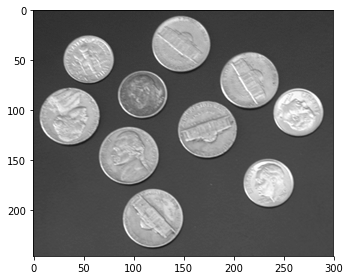

In [14]:
image = encode(imageFilename, textFilename, 1)
io.imshow(image)
io.show()

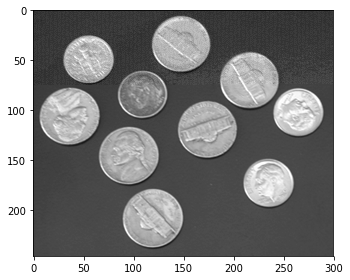

In [15]:
image = encode(imageFilename, textFilename, 4)
io.imshow(image)
io.show()

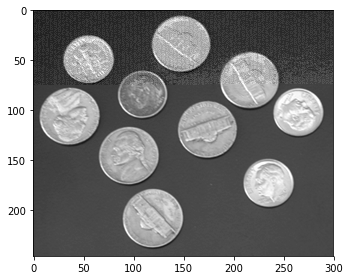

In [16]:
image = encode(imageFilename, textFilename, 5)
io.imshow(image)
io.show()

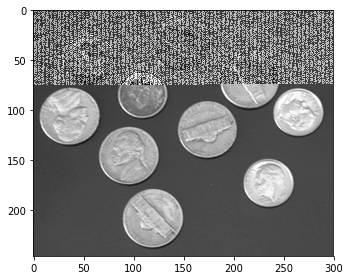

In [17]:
image = encode(imageFilename, textFilename, 8)
io.imshow(image)
io.show()

# Decodificación

Para la decodificación, se realiza el proceso inverso. En primera instancia se leen los nbits de los primeros 4 bits y posteriormente se lee el resto de los caracteres a un arreglo. Se termina este proceso cuando se encuentra el EOF designado. El proceso se puede apreciar por el siguiente código:

In [18]:
def bitstring_to_bytes(s):
    return int(s, 2).to_bytes(len(s) // 8, byteorder='big')

## Decodificar texto

In [19]:
def decodeText(encodedText):
    encodedTextNoBits = encodedText
    bitString = "".join([str(i) for i in encodedTextNoBits])
    decodedText = str(bitstring_to_bytes(bitString))[2:-1]
    return decodedText

## Decodificación de imagen

In [20]:
def decode(imageFilename):
    image = io.imread(imageFilename)
    encodedText = []
    textCount = 0
    nbits = 0
    for row in range(0,len(image)):
        for column in range(0,len(image[row])):
            if textCount < 4:
                encodedText.append(image[row][column] & 1)
            else:
                if textCount == 4:
                    nbits = 8*encodedText[0] + 4*encodedText[1] + 2*encodedText[2]+ 1*encodedText[3]

                encodedText.append((image[row][column] >> (nbits-1)) & 1)
                if((textCount+5)%8 == 0 and textCount > 36):
                    if(decodeText(encodedText[-32:]) == END_OF_FILE):
                        return decodeText(encodedText[4:-32])

            textCount += 1

## Pruebas de decodificación

In [21]:
print(decode("imagen_out.png"))

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Vivamus auctor maximus dignissim. Etiam luctus elit nec risus varius volutpat. Vivamus arcu ante, tempus nec luctus commodo, blandit vel neque. Pellentesque semper posuere purus, et finibus leo accumsan non. Sed sed felis vel erat pretium molestie. Nulla facilisi. Proin vel lacus et leo tristique luctus eu nec nulla. Nullam finibus lobortis porta. Vestibulum sit amet lacus eros. Aliquam tempus augue quis lacus gravida aliquet.\n\nMaecenas eget purus est. Etiam ac lectus ac magna commodo molestie in eget ante. Vestibulum porta mauris nec risus finibus, nec elementum purus vulputate. Nunc non eros lobortis, vestibulum nibh eget, sagittis justo. Suspendisse eget tellus vitae dolor fermentum elementum. Nulla luctus nulla vel volutpat dictum. Morbi ac nulla interdum, semper lacus quis, eleifend eros.\n\nPellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Vestibulum ante ipsum primis in faucibu

# Conclusiones

El proceso de codificación de texto en imágenes permite esconder texto. Una de las limitaciones principales tiene que ver con que el texto que se utilice debe ser menor en longitud al tamaño de la imagen. 

Lo anterior podría compensarse cuando se utilizan imánenes en colores ya que se triplica la cantidad de bytes disponibles para la codificación. Si se ocupan imágenes con transparencias \(alpha\). Podría agregarse una dimensión más, siempre y cuando considerando que sería más oportuno hacerlo con el bit menos significativo.

Uno de los principales problemas para manejar la encriptación tuvo que ver con el órden de los bits en la lista de los bits.

Otro punto interesante fue el delimitador final que se utilizó. Se considera que podria ser posible incluir el tamaño de la imagen al principio, sin embargo esto sería variable dependiento del tamaño.

Finalmente se puede mencionar que existen varios paquetes públicos para realizar esta encriptación. Algunos con varias opciones de configuración.
